<a href="https://colab.research.google.com/github/imuneeb33/Image-Reconstrution-through-Autoencoder/blob/main/Copy_of_Autoencoder_NN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Making an Autoencoder
Using Keras and training on MNIST

https://towardsdatascience.com/how-to-make-an-autoencoder-2f2d99cd5103

In [1]:
import tensorflow.keras as keras

Importing Necessary Modules/Packages

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from matplotlib import pyplot as plt
from IPython import display # If using IPython, Colab or Jupyter
import numpy as np

Loading MNIST Data

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

11490434/11490434 [==============================] - 0s 0us/step


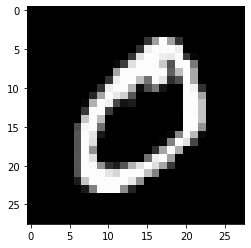

In [4]:
# Plot image data from x_train
plt.imshow(x_train[1], cmap = "gray")
plt.show()

Creating the Encoder

In [5]:
LATENT_SIZE = 32

encoder = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(64),
    LR(),
    Dropout(0.5),
    Dense(LATENT_SIZE),
    LR()
])

Creating the Decoder

In [6]:
decoder = Sequential([
    Dense(64, input_shape = (LATENT_SIZE,)),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(512),
    LR(),
    Dropout(0.5),
    # Dense(1024),
    # LR(),
    # Dropout(0.5),
    Dense(784),
    Activation("sigmoid"),
    Reshape((28, 28))
])

Creating the Full Model

In [ ]:
img = Input(shape = (28, 28))

latent_vector = encoder(img)
output = decoder(latent_vector)

model = Model(inputs = img, outputs = output)
model.compile(optimizer=keras.optimizers.Nadam(learning_rate=3e-4), loss = "mse")
autoencoder.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])


1/1 [==============================] - 0s 16ms/step


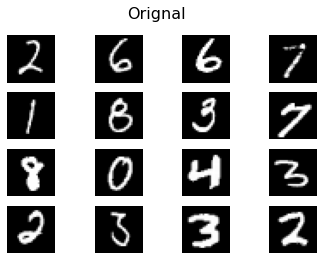

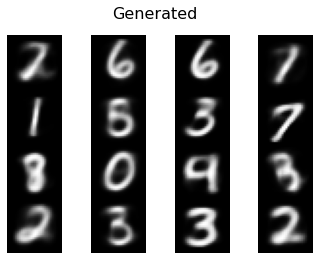

----------- EPOCH 55 -----------
 513/1875 [=======>......................] - ETA: 7s - loss: 0.0395

In [ ]:
EPOCHS = 60

#Only do plotting if you have IPython, Jupyter, or using Colab
for epoch in range(EPOCHS):
    fig1, axs1 = plt.subplots(4, 4)
    fig2, axs2 = plt.subplots(4, 4)
    fig1.suptitle('Orignal', fontsize=16)
    fig2.suptitle('Generated', fontsize=16)
    
    rand = x_test[np.random.randint(0, 10000, 16)].reshape((4, 4, 1, 28, 28))
    
    display.clear_output() # If you imported display from IPython
    
    for i in range(4):
        for j in range(4):
            axs2[i, j].imshow(model.predict(rand[i, j])[0], cmap = "gray")
            axs2[i, j].axis("off")
            axs1[i, j].imshow(rand[i, j][0],cmap = "gray")
            axs1[i, j].axis("off")
    
    plt.subplots_adjust(wspace = 0, hspace = 0)
    plt.show()
    print("-----------", "EPOCH", epoch, "-----------")
    model.fit(x_train, x_train)